In [1]:
import pandas as pd

# Load the dataset from GitHub
url = 'https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/epilepsy.data'
df = pd.read_csv(url)

# Display first few rows
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
%matplotlib inline

# Checking the data

In [3]:
print(df.shape)
df.info()

(195, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          193 non-null    float64
 8   Jitter:DDP        194 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    

In [4]:
#mean and median are aroung the same range.
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,193.000000,194.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003468,0.009932,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002765,0.008925,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001880,0.004982,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002700,0.007455,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003960,0.011558,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [5]:
df.isna().mean()

name                0.000000
MDVP:Fo(Hz)         0.000000
MDVP:Fhi(Hz)        0.000000
MDVP:Flo(Hz)        0.000000
MDVP:Jitter(%)      0.000000
MDVP:Jitter(Abs)    0.000000
MDVP:RAP            0.000000
MDVP:PPQ            0.010256
Jitter:DDP          0.005128
MDVP:Shimmer        0.000000
MDVP:Shimmer(dB)    0.000000
Shimmer:APQ3        0.000000
Shimmer:APQ5        0.000000
MDVP:APQ            0.000000
Shimmer:DDA         0.000000
NHR                 0.000000
HNR                 0.000000
status              0.000000
RPDE                0.000000
DFA                 0.000000
spread1             0.000000
spread2             0.000000
D2                  0.000000
PPE                 0.000000
dtype: float64

In [6]:
df=df.dropna()

In [8]:
# df.drop('status',axis=1).corr()

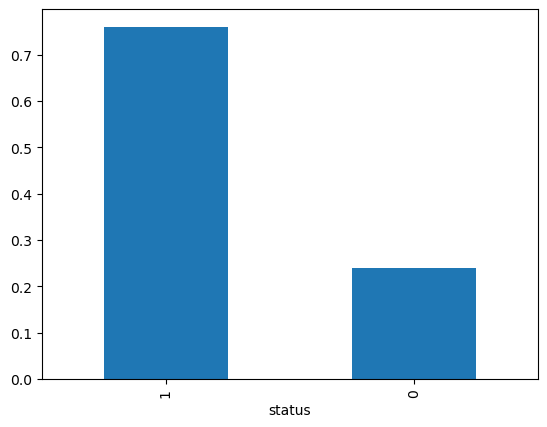

In [9]:
df['status'].value_counts(normalize=True).plot(kind='bar');

In [10]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

## Target and feature data segregation

In [12]:
target='status'
features=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']
X=df[features]
y=df[target]

In [13]:
X.shape,y.shape

((192, 22), (192,))

## Train test split

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(153, 22)
(153,)
(39, 22)
(39,)


In [15]:
#accuracy
y_base_accuracy=y_train.value_counts(normalize=True).max()
y_base_accuracy

0.7712418300653595

## Feature Scaling

In [16]:
scale=StandardScaler()
X_train=pd.DataFrame(scale.fit_transform(X_train),columns=X.columns)
X_test=pd.DataFrame(scale.transform(X_test),columns=X.columns)

## Logistic Regression

In [18]:
lm=LogisticRegression()
rfe=RFE(lm,n_features_to_select=15)
rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True  True  True False  True False  True False  True
  True False False  True  True False  True  True  True  True]
[1 1 7 1 1 1 5 1 3 1 4 1 1 2 8 1 1 6 1 1 1 1]


In [19]:
col=X_train.columns[rfe.support_]
X_train=X_train[col]
X_test=X_test[col]

In [20]:
lm.fit(X_train,y_train)

LogisticRegression()

In [21]:
#accuracy improved by 10%
print(lm.score(X_train,y_train))
print(lm.score(X_test,y_test))

0.8758169934640523
0.8717948717948718


<Axes: >

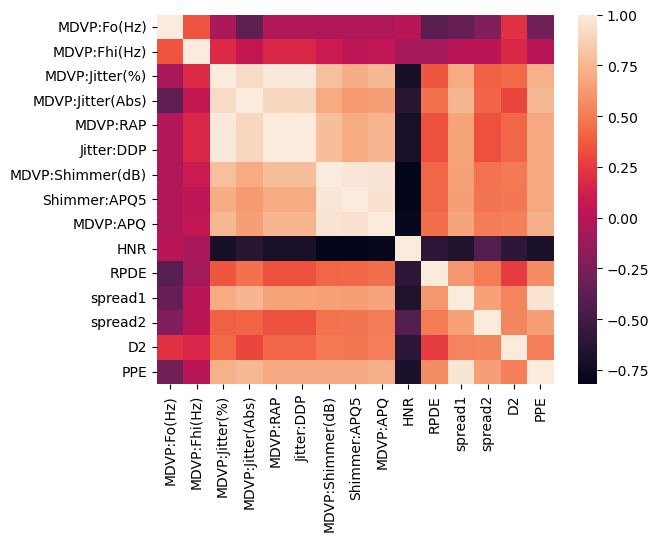

In [22]:
sns.heatmap(X_train.corr())

- In above model, we let some of the data go to waste when we used the RFE function to choose columns which provide best predictions. Furthermore, there are cases of high correlation among the independent variables in 'X_train'. So, we move on to decision tree model.



## Decision tree

In [23]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(153, 22)
(153,)
(39, 22)
(39,)


In [24]:
dt = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=42)
)
dt.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

- please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

## Accuracy Scores

In [25]:
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

1.0
0.8974358974358975


## Random Forest

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(153, 22)
(153,)
(39, 22)
(39,)


In [27]:
clf = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)
print(clf)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [28]:
cv_acc_scores = cross_val_score(clf,X_train,y_train,cv=5,n_jobs=-1)
print(cv_acc_scores)

[0.87096774 0.87096774 0.93548387 0.96666667 0.9       ]


In [29]:
params = {
    'randomforestclassifier__n_estimators':range(25,100,10),
    'randomforestclassifier__max_depth':range(10,21,1)
}
params

{'randomforestclassifier__n_estimators': range(25, 100, 10),
 'randomforestclassifier__max_depth': range(10, 21)}

In [30]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 21),
                         'randomforestclassifier__n_estimators': range(25, 100, 10)},
             verbose=1)

- please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [31]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 88 candidates, totalling 440 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 21),
                         'randomforestclassifier__n_estimators': range(25, 100, 10)},
             verbose=1)

In [32]:
print('training accuracy ={}'.format(model.score(X_train,y_train)))
print('test accuracy ={}'.format(model.score(X_test,y_test)))

training accuracy =1.0
test accuracy =0.8717948717948718


## Gradient boosting Classifier

In [33]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

clf = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(random_state=42)
)
print(clf)

(153, 22)
(153,)
(39, 22)
(39,)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])


In [34]:
params = {
    'gradientboostingclassifier__n_estimators':range(25,100,10),
    'gradientboostingclassifier__max_depth':range(10,21,1)
}
params

{'gradientboostingclassifier__n_estimators': range(25, 100, 10),
 'gradientboostingclassifier__max_depth': range(10, 21)}

In [35]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(10, 21),
                         'gradientboostingclassifier__n_estimators': range(25, 100, 10)},
             verbose=1)

In [36]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 88 candidates, totalling 440 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(10, 21),
                         'gradientboostingclassifier__n_estimators': range(25, 100, 10)},
             verbose=1)

In [37]:
print('training accuracy ={}'.format(model.score(X_train,y_train)))
print('test accuracy ={}'.format(model.score(X_test,y_test)))

training accuracy =1.0
test accuracy =0.8974358974358975


## Adaboost classifier

In [38]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

clf = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(random_state=42)
)
print(clf)

(153, 22)
(153,)
(39, 22)
(39,)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier', AdaBoostClassifier(random_state=42))])


In [39]:
params = {
    'adaboostclassifier__n_estimators':range(25,100,10)
}
params

{'adaboostclassifier__n_estimators': range(25, 100, 10)}

In [40]:
{'adaboostclassifier__n_estimators': range(25, 100, 10)}

{'adaboostclassifier__n_estimators': range(25, 100, 10)}

In [41]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('adaboostclassifier',
                                        AdaBoostClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'adaboostclassifier__n_estimators': range(25, 100, 10)},
             verbose=1)

In [42]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('adaboostclassifier',
                                        AdaBoostClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'adaboostclassifier__n_estimators': range(25, 100, 10)},
             verbose=1)

In [43]:
print('training accuracy ={}'.format(model.score(X_train,y_train)))
print('test accuracy ={}'.format(model.score(X_test,y_test)))

training accuracy =1.0
test accuracy =0.8974358974358975


- The better model in all of the above cases is the Decision tree Classifier as it can bypass the issue of multicollinearity and is much less complex compared to other models, hance, faster. The worst is Adaboost classifier.

## Decision Tree

In [44]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(153, 22)
(153,)
(39, 22)
(39,)


In [45]:
dt = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=42)
)
dt.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [46]:
## accuracy score
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

1.0
0.8974358974358975


In [47]:
y_pred2=dt.predict(X_test)

In [48]:
cnf=confusion_matrix(y_test,y_pred2)
print('training accuracy = {}'.format(round(accuracy_score(y_train,dt.predict(X_train)),2)))
print('test accuracy = {}'.format(round((cnf[0][0]+cnf[1][1])/(cnf[0][0]+cnf[0][1]+cnf[1][0]+cnf[1][1]),2)))
print('test precision = {}'.format(round((cnf[1][1])/(cnf[0][1]+cnf[1][1]),2)))
print('test recall = {}'.format(round((cnf[1][1])/(cnf[1][0]+cnf[1][1]),2)))
print('test error = {}'.format(round((cnf[0][1]+cnf[1][0])/(cnf[0][0]+cnf[0][1]+cnf[1][0]+cnf[1][1]),2)))


training accuracy = 1.0
test accuracy = 0.9
test precision = 0.93
test recall = 0.93
test error = 0.1


In [49]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.93      0.93      0.93        28

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39



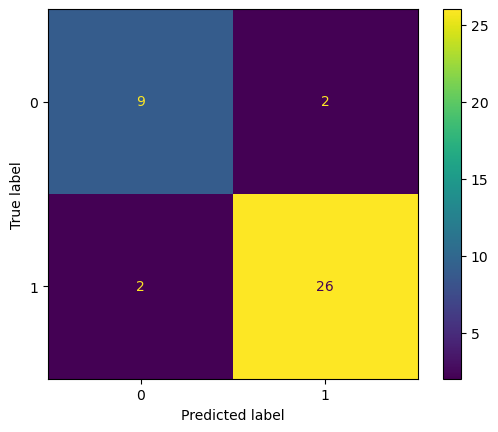

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred2)

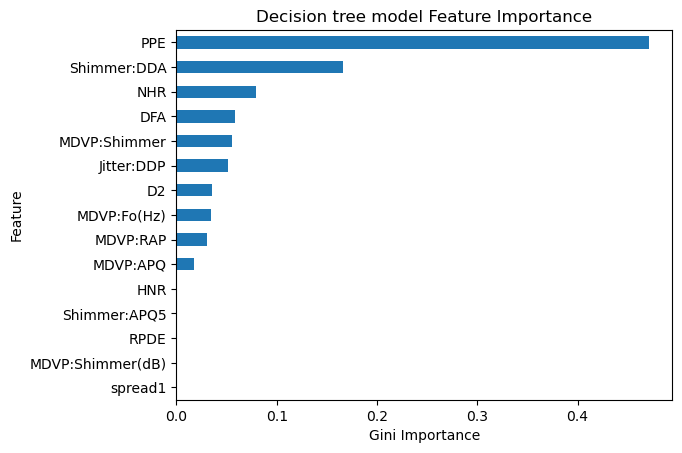

In [51]:
#Feature Importance
importances = dt.named_steps['decisiontreeclassifier'].feature_importances_

# Add importances into a Series
feat_imp = pd.Series(importances,index=X_train.columns).sort_values()
# plot
feat_imp.tail(15).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Decision tree model Feature Importance");

In [52]:
feat_imp.tail(9).sum()

0.9821941765776485